   nthvalue   1   2   3   4
0        01  08  41  b3  4b
1        01  2d  1b  9a  35
2        02  2d  1b  9a  35
3        03  2c  1c  9a  35
4        04  2b  1d  9a  36
5        06  2b  1d  9b  36
6        07  2a  1e  9b  36
7        08  2a  1e  9b  37
8        09  2a  1e  9b  37
9        0a  2a  1f  9b  37
10       0c  29  1f  9b  38
11       0d  29  1f  9b  38
12       0e  28  20  9c  38
13       0f  28  20  9c  39
14       10  28  20  9c  39
15       11  28  21  9c  39
16       12  28  21  9c  39
17       13  28  22  9d  39
18       14  28  22  9d  3a
19       15  27  22  9d  3a
Numero di campioni acquisiti da unita' 1:  1870
Numero di campioni acquisiti da unita' 2:  2151
Numero di campioni acquisiti da unita' 3:  2246
Divido il dataset in 14 parti da 128 campioni l'una
c= 0
0           NaN
1      0.062992
2           NaN
3           NaN
4           NaN
         ...   
123         NaN
124         NaN
125         NaN
126         NaN
127         NaN
Name: 1, Length: 128, dtype: float6

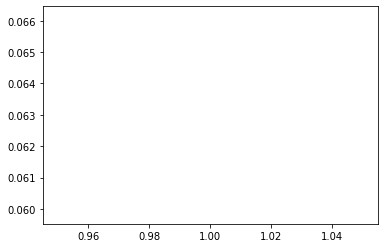

c= 1
128   NaN
129   NaN
130   NaN
131   NaN
132   NaN
       ..
251   NaN
252   NaN
253   NaN
254   NaN
255   NaN
Name: 1, Length: 128, dtype: float64


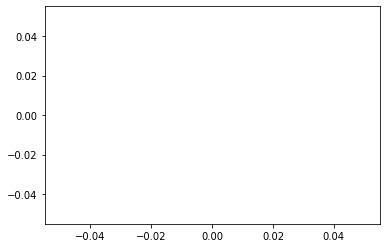

c= 2
256         NaN
257    0.354331
258    0.354331
259    0.346457
260    0.338583
         ...   
379    0.220472
380    0.220472
381    0.220472
382    0.220472
383    0.220472
Name: 1, Length: 128, dtype: float64


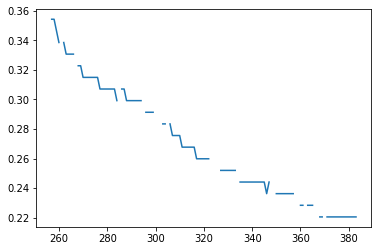

c= 3
384    0.220472
385    0.220472
386    0.220472
387    0.220472
388         NaN
         ...   
507         NaN
508    0.188976
509         NaN
510         NaN
511    0.188976
Name: 1, Length: 128, dtype: float64


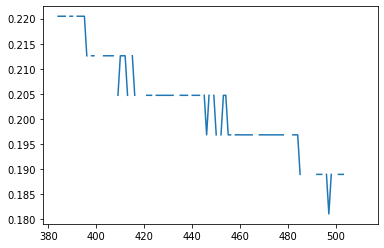

c= 4
512    0.188976
513    0.188976
514    0.188976
515         NaN
516    0.188976
         ...   
635         NaN
636         NaN
637         NaN
638         NaN
639         NaN
Name: 1, Length: 128, dtype: float64


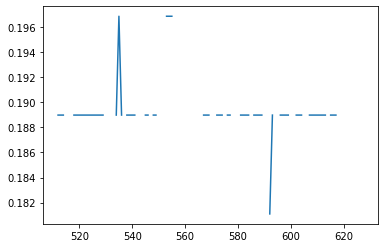

c= 5
640         NaN
641    0.188976
642         NaN
643    0.188976
644    0.188976
         ...   
763    0.181102
764    0.181102
765         NaN
766         NaN
767    0.181102
Name: 1, Length: 128, dtype: float64


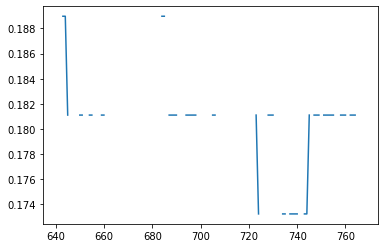

c= 6
768    0.181102
769    0.181102
770    0.181102
771    0.181102
772    0.181102
         ...   
891    0.181102
892    0.181102
893         NaN
894    0.181102
895    0.181102
Name: 1, Length: 128, dtype: float64


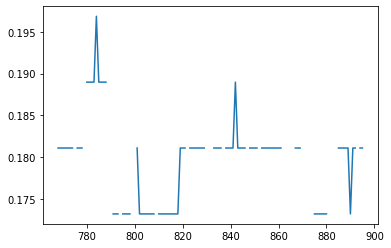

c= 7
896     0.181102
897     0.181102
898          NaN
899     0.181102
900     0.173228
          ...   
1019         NaN
1020    0.181102
1021    0.188976
1022    0.181102
1023    0.181102
Name: 1, Length: 128, dtype: float64


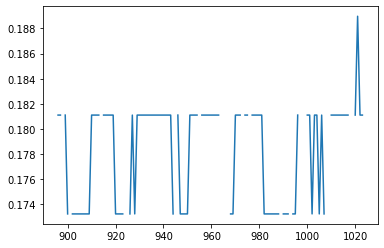

c= 8
1024    0.181102
1025    0.181102
1026    0.181102
1027    0.181102
1028    0.181102
          ...   
1147         NaN
1148    0.188976
1149    0.188976
1150    0.188976
1151    0.188976
Name: 1, Length: 128, dtype: float64


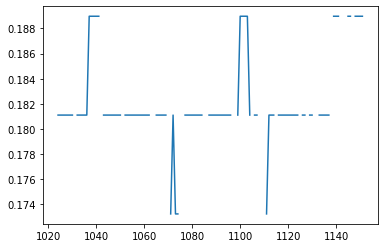

c= 9
1152    0.188976
1153    0.181102
1154         NaN
1155         NaN
1156         NaN
          ...   
1275    0.181102
1276    0.181102
1277    0.188976
1278    0.188976
1279    0.188976
Name: 1, Length: 128, dtype: float64


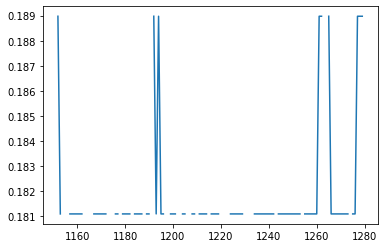

c= 10
1280    0.181102
1281    0.181102
1282    0.188976
1283    0.188976
1284         NaN
          ...   
1403    0.204724
1404    0.204724
1405    0.204724
1406    0.204724
1407    0.204724
Name: 1, Length: 128, dtype: float64


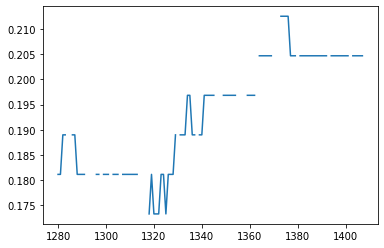

c= 11
1408    0.204724
1409    0.204724
1410    0.204724
1411    0.204724
1412    0.204724
          ...   
1531    0.204724
1532    0.204724
1533    0.204724
1534    0.196850
1535    0.204724
Name: 1, Length: 128, dtype: float64


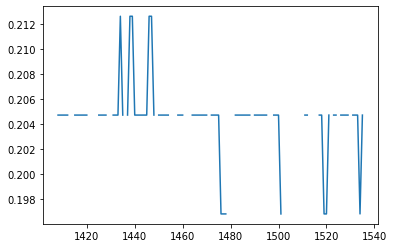

c= 12
1536    0.204724
1537         NaN
1538         NaN
1539    0.204724
1540    0.204724
          ...   
1659    0.196850
1660    0.196850
1661         NaN
1662    0.196850
1663    0.196850
Name: 1, Length: 128, dtype: float64


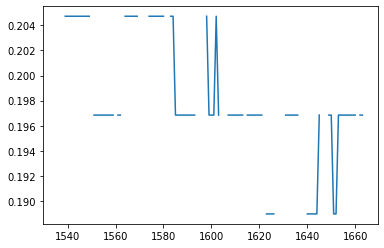

c= 13
1664    0.196850
1665    0.196850
1666    0.196850
1667    0.196850
1668    0.196850
          ...   
1787    0.204724
1788    0.204724
1789    0.204724
1790    0.204724
1791    0.204724
Name: 1, Length: 128, dtype: float64


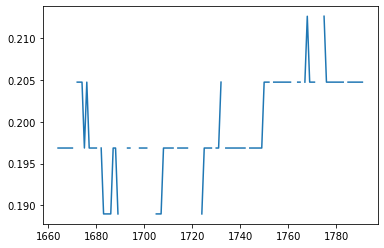

Wall time: 7.11 s


In [99]:
%%time

globals().clear()

digit2voltage = 9/640  #value used to convert sample value to voltage
chunksize = 128 #number of samples taken for computing a chunk of data

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import math
import matplotlib.pyplot as plt
import statistics
from pyquaternion import Quaternion
import numpy as np
import scipy.signal
from sklearn.decomposition import PCA
import scipy.stats as stats
import matplotlib.animation as animation

plt.rcParams.update({'figure.max_open_warning': 0})

data = pd.read_csv('Stefano_L_B.txt', sep=",|:", header=None, engine='python')

data.columns = ['TxRx', 'DevID', 'B', 'C', 'nthvalue', '1', '2', '3', '4', 'None']
# select only the Rx line
data = data.loc[data['TxRx'] == 'Rx']
data = data.drop(['TxRx', 'None'], axis=1)
data = data.reset_index(drop=True)  # reset the indexes order
# traforming into string in order to remove [ and ] from the file\
data['DevID'] = data['DevID'].astype(str)
data['DevID'] = data['DevID'].str.replace('[', '')
data['DevID'] = data['DevID'].str.replace(']', '')

data['B'] = data['B'].astype(str)
data['B'] = data['B'].str.replace('[', '')
data['B'] = data['B'].str.replace(']', '')

data['C'] = data['C'].astype(str)
data['C'] = data['C'].str.replace('[', '')
data['C'] = data['C'].str.replace(']', '')

data['nthvalue'] = data['nthvalue'].astype(str)
data['nthvalue'] = data['nthvalue'].str.replace('[', '')
data['nthvalue'] = data['nthvalue'].str.replace(']', '')

data['1'] = data['1'].astype(str)
data['1'] = data['1'].str.replace('[', '')
data['1'] = data['1'].str.replace(']', '')

data['2'] = data['2'].astype(str)
data['2'] = data['2'].str.replace('[', '')
data['2'] = data['2'].str.replace(']', '')

data['3'] = data['3'].astype(str)
data['3'] = data['3'].str.replace('[', '')
data['3'] = data['3'].str.replace(']', '')

data['4'] = data['4'].astype(str)
data['4'] = data['4'].str.replace('[', '')
data['4'] = data['4'].str.replace(']', '')

data_1 = data[data['DevID'].str.contains('01')]  # thoracic data
data_1 = data_1.reset_index(drop=True)

data_2 = data[data['DevID'].str.contains('02')]  # abdominal data
data_2 = data_2.reset_index(drop=True)

data_3 = data[data['DevID'].str.contains('03')]  # reference data
data_3 = data_3.reset_index(drop=True)

data_1 = data_1[data_1.columns[3:8]].copy()
data_2 = data_2[data_2.columns[3:8]].copy()
data_3 = data_3[data_3.columns[3:8]].copy()
print(data_1.head(20))
print("Numero di campioni acquisiti da unita' 1: ", len(data_1))
print("Numero di campioni acquisiti da unita' 2: ", len(data_2))
print("Numero di campioni acquisiti da unita' 3: ", len(data_3))

if len(data_3) > len(data_1) and len(data_3) > len(data_2):
    max_value = math.floor(len(data_3) / 256)
    #max_value = math.ceil(len(data_3) / 256)
elif len(data_1) > len(data_2) and len(data_1) > len(data_3):
    max_value = math.floor(len(data_1) / 256)
    #max_value = math.ceil(len(data_1) / 256)
else:
    max_value = math.floor((len(data_2)) / 256)
# conversion from hexadecimal to decimal
data_1['nthvalue'] = data_1['nthvalue'].apply(int, base=16)
data_2['nthvalue'] = data_2['nthvalue'].apply(int, base=16)
data_3['nthvalue'] = data_3['nthvalue'].apply(int, base=16)

data_1['1'] = data_1['1'].apply(int, base=16)
data_2['1'] = data_2['1'].apply(int, base=16)
data_3['1'] = data_3['1'].apply(int, base=16)

data_1['2'] = data_1['2'].apply(int, base=16)
data_2['2'] = data_2['2'].apply(int, base=16)
data_3['2'] = data_3['2'].apply(int, base=16)

data_1['3'] = data_1['3'].apply(int, base=16)
data_2['3'] = data_2['3'].apply(int, base=16)
data_3['3'] = data_3['3'].apply(int, base=16)

data_1['4'] = data_1['4'].apply(int, base=16)
data_2['4'] = data_2['4'].apply(int, base=16)
data_3['4'] = data_3['4'].apply(int, base=16)

max_value=max_value-1

for i in range(max_value):
    for j in range(256):
        if data_1['nthvalue'][j + i * 256] != j:
            empty_row = pd.DataFrame([], index=[j + i * 256])  # creating the empty row
            data_1 = pd.concat([data_1.loc[:j + i * 256 - 1], empty_row, data_1.loc[j + i * 256:]])
            #print(i)
            data_1 = data_1.reset_index(drop=True)
            
data_1 = data_1.iloc[:max_value * 256]

for i in range(max_value):
    for j in range(256):
        if data_2['nthvalue'][j + i * 256] != j:
            empty_row = pd.DataFrame([], index=[j + i * 256])  # creating the empty data
            data_2 = pd.concat([data_2.loc[:j + i * 256 - 1], empty_row, data_2.loc[j + i * 256:]])
            data_2 = data_2.reset_index(drop=True)

data_2 = data_2.iloc[:max_value * 256]

for i in range(max_value):
    for j in range(256):
        if data_3['nthvalue'][j + i * 256] != j:
            empty_row = pd.DataFrame([], index=[j + i * 256])  # creating the empty data
            data_3 = pd.concat([data_3.loc[:j + i * 256 - 1], empty_row, data_3.loc[j + i * 256:]])
            data_3 = data_3.reset_index(drop=True)

data_3 = data_3.iloc[:max_value * 256]

list1 = [len(data_1),len(data_2),len(data_3)]   
min_samples = min(list1)  #shortest number of samples
n_chunks = math.floor(min_samples / chunksize)
print("Divido il dataset in",n_chunks,"parti da",chunksize,"campioni l'una")

#cut every dataframe to the size
data_1 = data_1[:n_chunks*chunksize]
data_2 = data_2[:n_chunks*chunksize]
data_3 = data_3[:n_chunks*chunksize]

for c in range(n_chunks):
    print("c=",c)
    pezzo = data_1.loc[c*chunksize:(c+1)*chunksize-1, '1']
    for i in range(len(pezzo)):
        if pezzo[i+c*chunksize] > 127:
            pezzo[i+c*chunksize] = pezzo[i+c*chunksize] - 256
    pezzo = pezzo / 127
    print(pezzo)

    plt.plot(pezzo)
    plt.pause(0.1)

plt.show()
    
    

